## IMPORT PACKAGES

In [356]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

## READ DATA

In [359]:
obesity_data = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

## DATA EXPLORATION

In [362]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [364]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [366]:
obesity_data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [368]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [370]:
obesity_data['NObeyesdad'].value_counts()

NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### OBESITY DISTRIBUTION

Text(0, 0.5, 'Count')

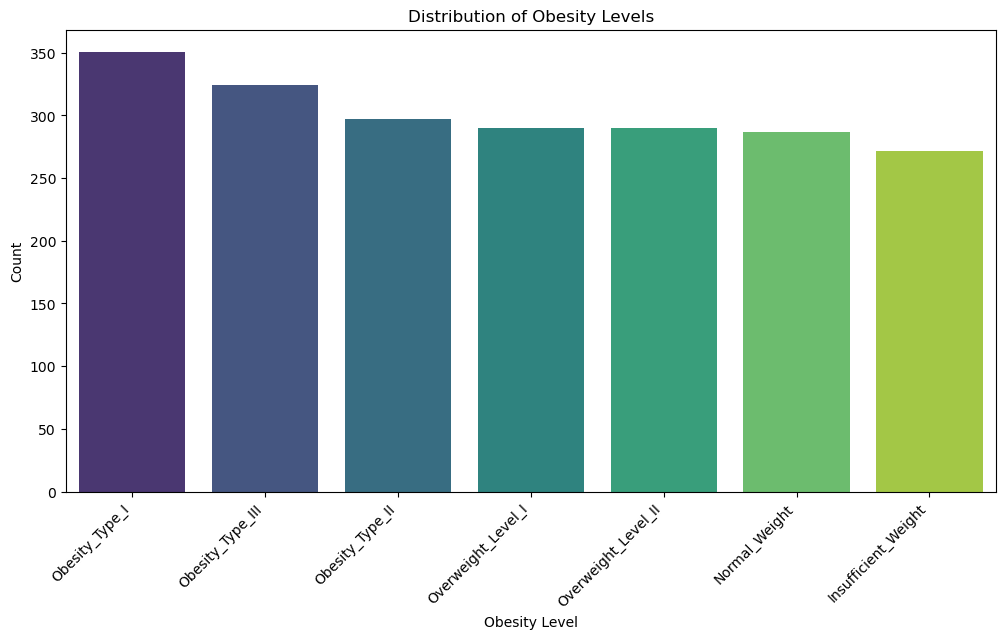

In [373]:
plt.figure(figsize=(12, 6))
sns.countplot(data=obesity_data, x='NObeyesdad', palette='viridis', order=obesity_data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Count')

### GENDER DISTRIBUTION ACROSS OBESITY LEVELS 

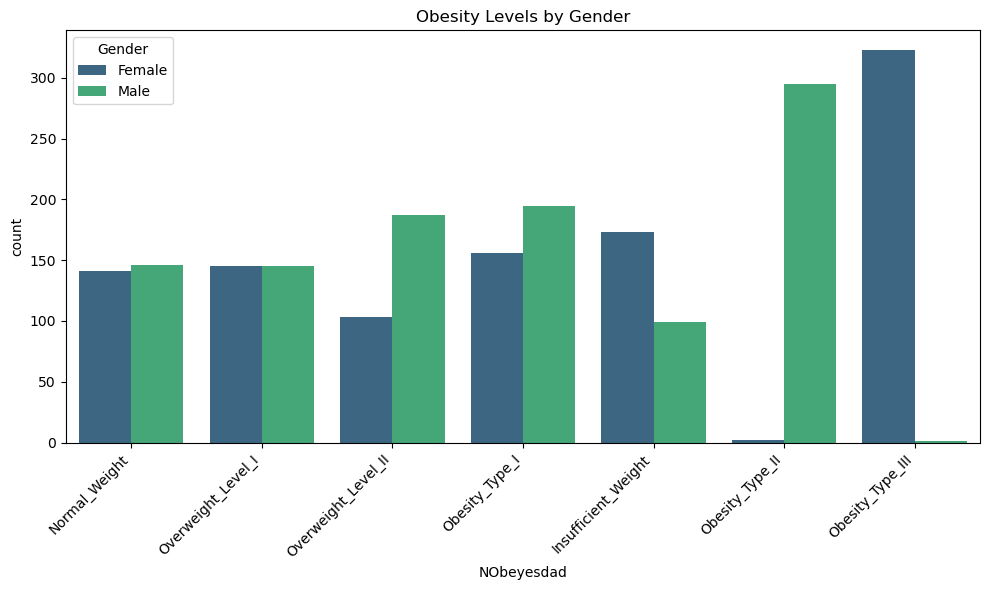

In [376]:
plt.figure(figsize=(10, 6))
sns.countplot(data=obesity_data, x='NObeyesdad', hue='Gender', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Obesity Levels by Gender')
plt.tight_layout()

### BMI DISTRIBUTION BY GENDER

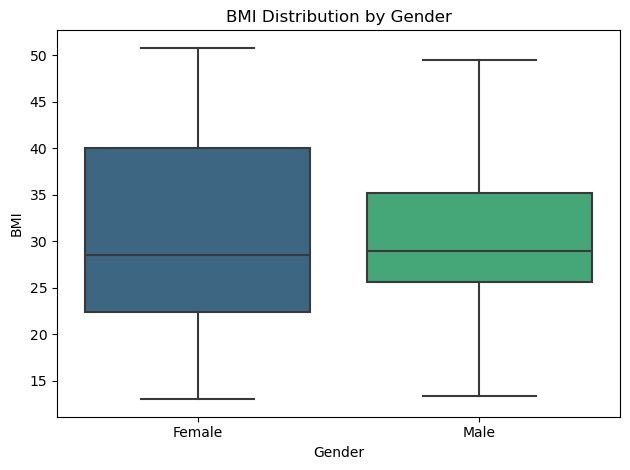

In [379]:
# BMI calculation
obesity_data['BMI'] = obesity_data['Weight'] / (obesity_data['Height'] ** 2)

sns.boxplot(data=obesity_data, x='Gender', y='BMI', palette='viridis')
plt.title('BMI Distribution by Gender')
plt.tight_layout()

## DISTRIBUTION OF CATEGORICAL VARIABLES

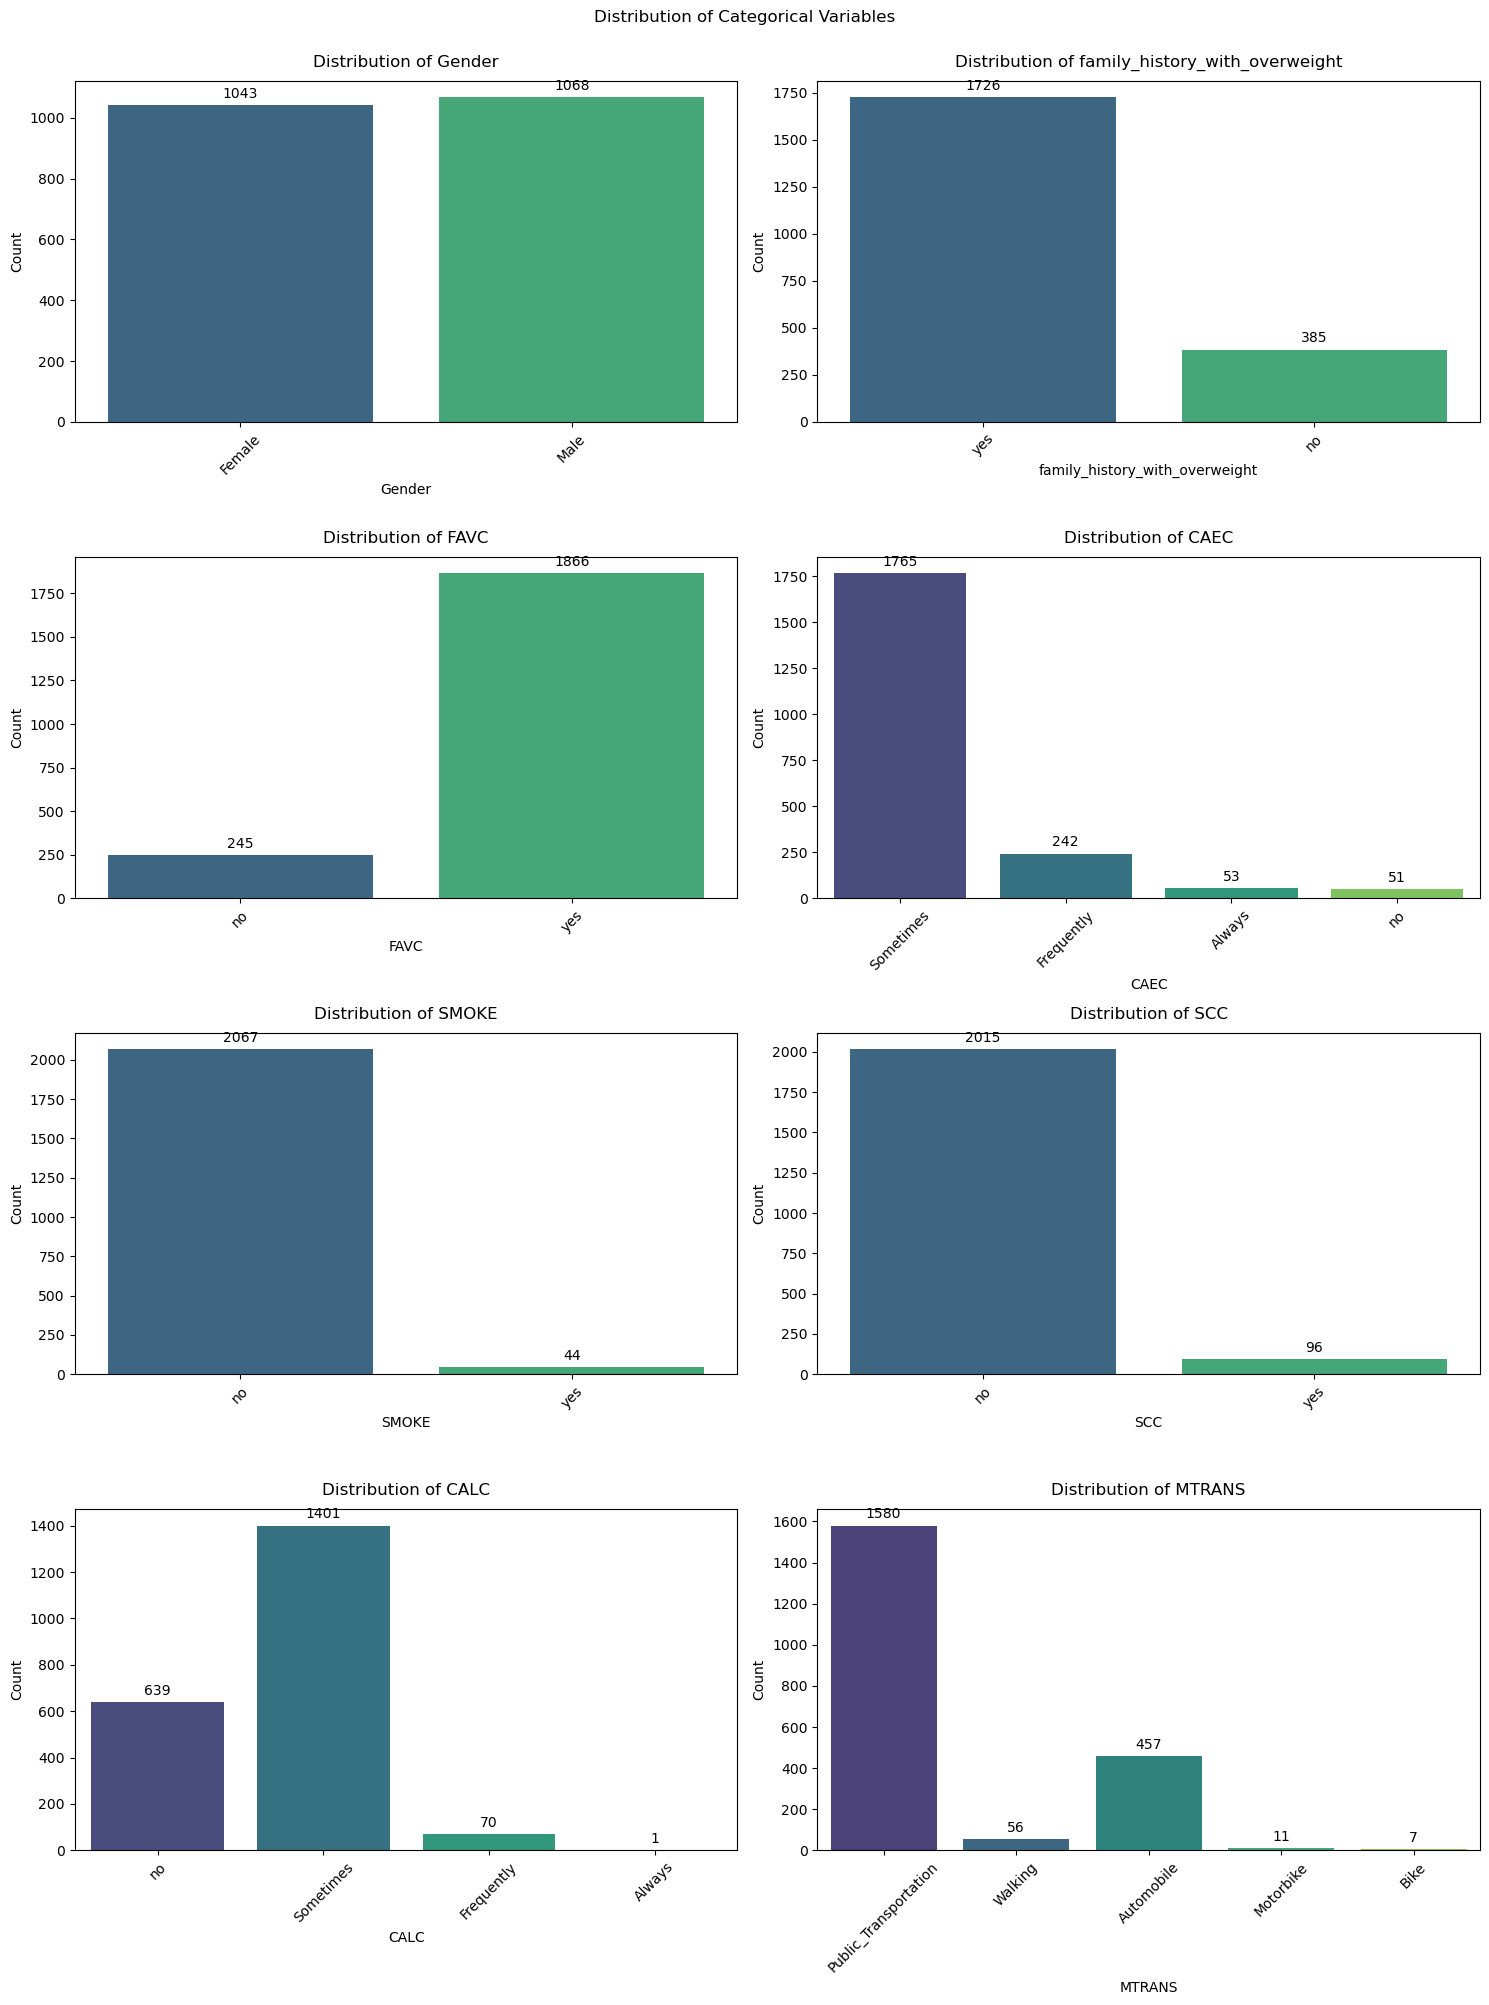

In [382]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 
                       'SMOKE', 'SCC', 'CALC', 'MTRANS']

# Create a figure with a grid layout (4 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
fig.suptitle('Distribution of Categorical Variables', fontsize=12, y=1)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create countplots for each categorical variable
for idx, column in enumerate(categorical_columns):
    sns.countplot(data=obesity_data, x=column, ax=axes[idx], palette='viridis')
    
    # Customize each subplot
    axes[idx].set_title(f'Distribution of {column}', pad=10)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for container in axes[idx].containers:
        axes[idx].bar_label(container, padding=3)
    
    # Adjust y-axis label
    axes[idx].set_ylabel('Count')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

### RELATIONSHIPS BETWEEN NUMERIC VARIABLES

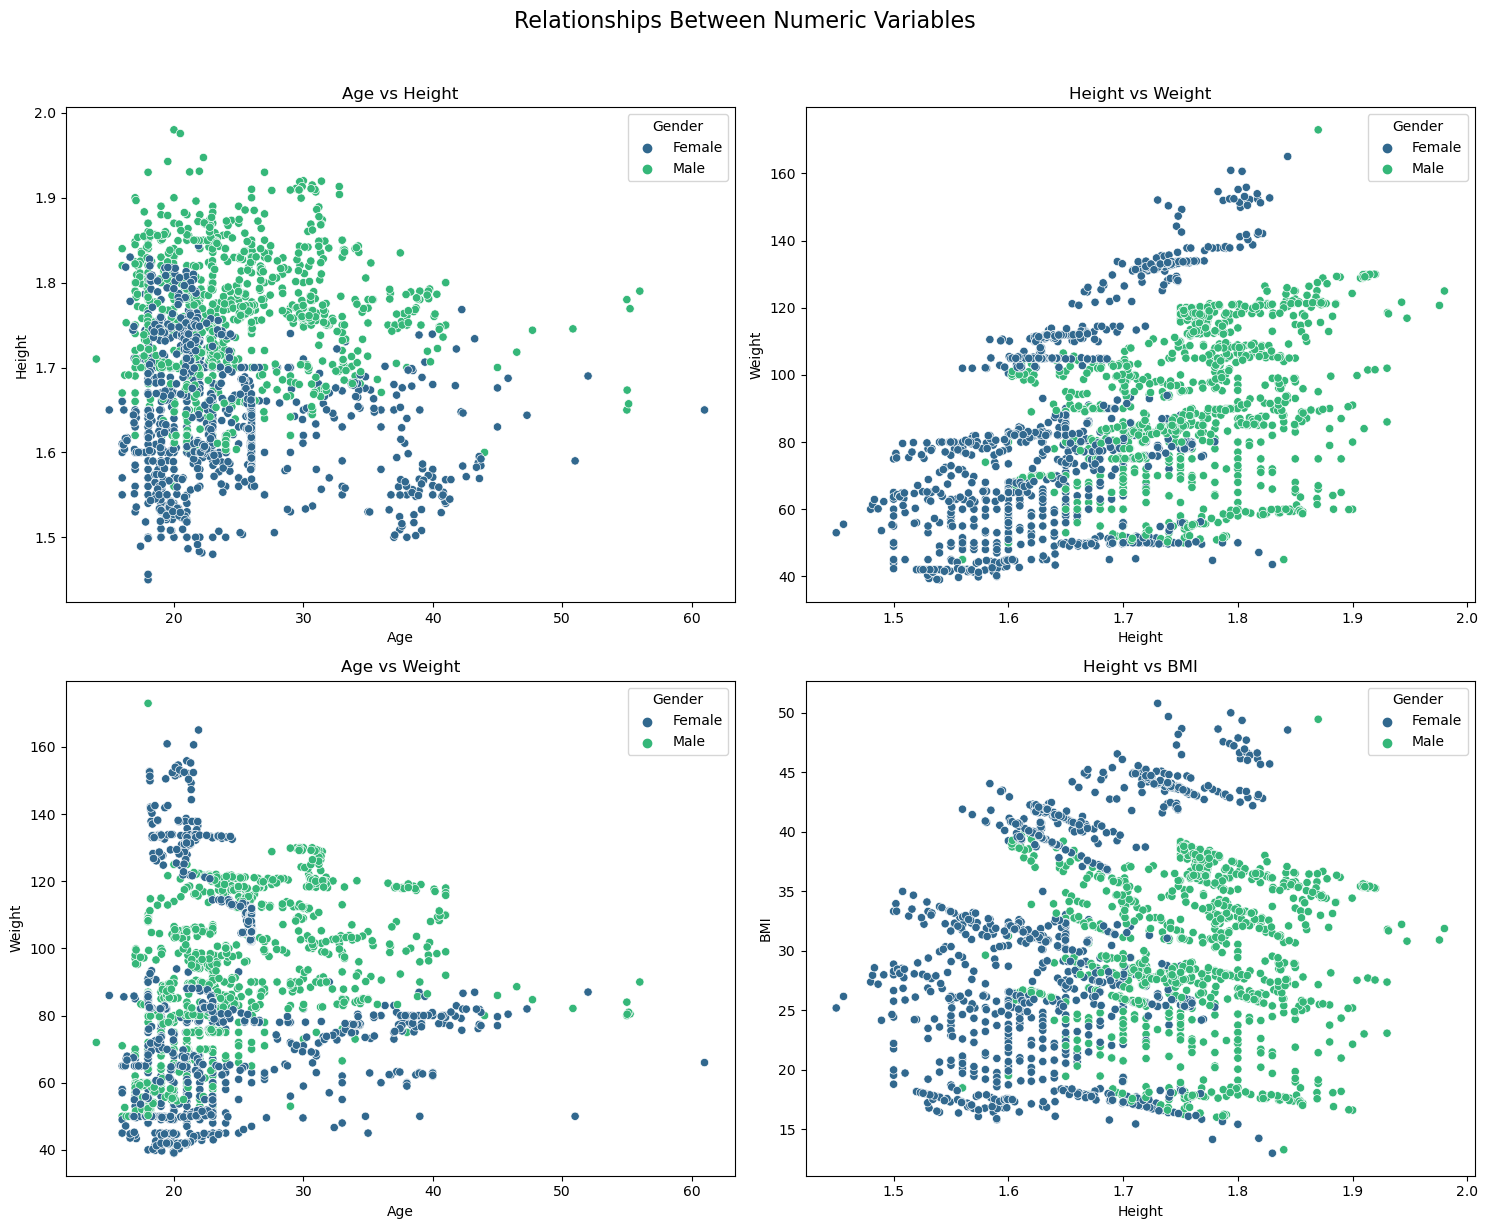

In [385]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Relationships Between Numeric Variables', fontsize=16, y=1.02)

# 1. Age vs BMI
sns.scatterplot(data=obesity_data, x='Age', y='Height', hue='Gender', ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Age vs Height')

# 2. Height vs Weight
sns.scatterplot(data=obesity_data, x='Height', y='Weight', hue='Gender', ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Height vs Weight')

# 3. Age vs Weight
sns.scatterplot(data=obesity_data, x='Age', y='Weight', hue='Gender', ax=axes[1,0], palette='viridis')
axes[1,0].set_title('Age vs Weight')

# 4. Height vs BMI
sns.scatterplot(data=obesity_data, x='Height', y='BMI', hue='Gender', ax=axes[1,1], palette='viridis')
axes[1,1].set_title('Height vs BMI')

plt.tight_layout()

## CORRELATION HEATMAP

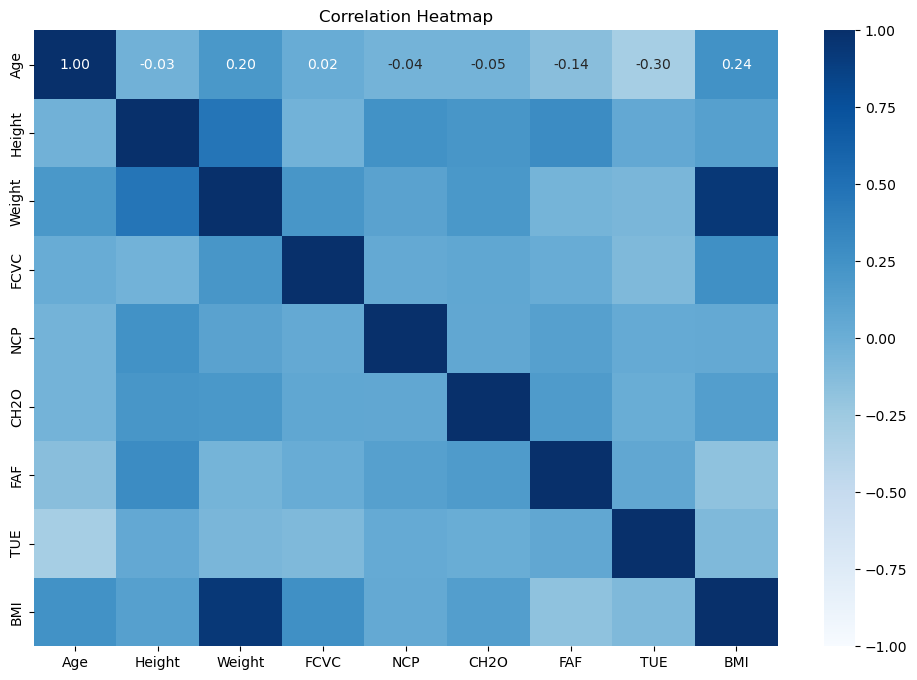

In [388]:
numerical_features = obesity_data.select_dtypes(include=['float64']).columns

correlation_matrix = obesity_data[numerical_features].corr()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

## ENCODING CATEGORICAL VARIABLES

In [391]:
from sklearn import preprocessing

## target variable(ordinal variable), uses OrdinalEncoder 
enc = preprocessing.OrdinalEncoder()
obesity_data['NObeyesdad'] = enc.fit_transform(obesity_data['NObeyesdad'].values.reshape(-1,1))

## nominal data uses OneHotEncoder
enc = preprocessing.OneHotEncoder()
obesity_transformed = enc.fit_transform(obesity_data[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']]).toarray()

## creating the dataframe
cols = []
for i in enc.categories_:
    cols.extend(i)
obesity_data = obesity_data.join(pd.DataFrame(obesity_transformed, columns = cols))
obesity_data = obesity_data.drop(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], axis = 1)

obesity_data

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,BMI,...,yes,Always,Frequently,Sometimes,no,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0,24.386526,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0,24.238227,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,1.0,23.765432,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,5.0,26.851852,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,6.0,28.342381,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,4.0,44.901475,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,4.0,43.741923,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,4.0,43.543817,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,4.0,44.071535,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### CLASSIFYING DATASET INTO INPUT AND OUTPUT VARIABLES

In [394]:
X = obesity_data.drop('NObeyesdad', axis = 1)
y = obesity_data['NObeyesdad']

### SPLITTING INTO TRAIN AND TEST DATA

In [397]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0, stratify = y)

## SMOTE IMPLEMENTATION

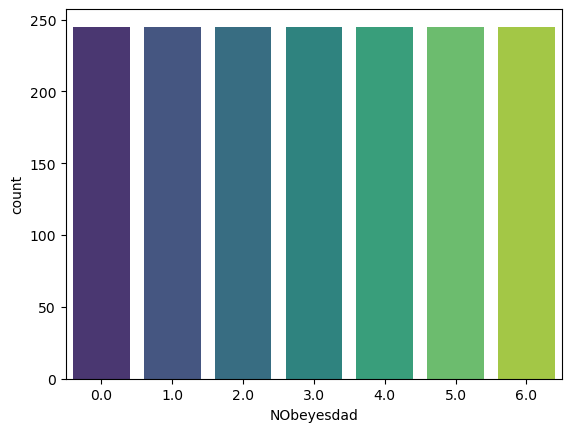

In [400]:
from imblearn.over_sampling import SMOTE

resampler=SMOTE(random_state=0)
X_train,y_train=resampler.fit_resample(X_train,y_train)

sns.countplot(x=y_train, palette='viridis')
plt.show()

### REMOVING FEATURES WITH LOW VARIANCE

In [403]:
from sklearn.feature_selection import VarianceThreshold
variance_selector = VarianceThreshold(threshold = 0)

X_train_fs = variance_selector.fit_transform(X_train)
X_test_fs = variance_selector.transform(X_test)

print(f"{X_train.shape[1] - X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

1 features have been removed, 31 features remain


### CHECKING DROPPED FEATURES

In [406]:
selected_features = variance_selector.get_support()
selected_features = selected_features.reshape(32,1)

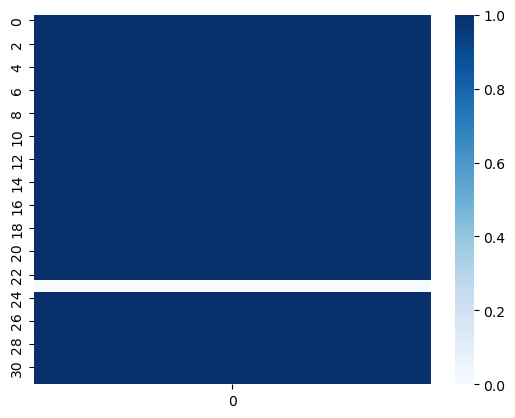

In [408]:
sns.heatmap(selected_features, cmap = 'Blues')
plt.show()

### RECURSIVE FEATURE ELIMINATION USING RFECV 

In [411]:
## Import Scikit Learn packages
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import RFECV

### SCALING THE DATA

In [414]:
scaler = StandardScaler()
X_train_fs = scaler.fit_transform(X_train_fs)
X_test_fs = scaler.transform(X_test_fs)

### USING RANDOMFORESTCLASSIFIER AS BASE MODEL 

In [417]:
rf = RandomForestClassifier(random_state=0) 
rfecv = RFECV(rf, cv=3, step=5)
X_train_fs = rfecv.fit_transform(X_train_fs, y_train)
X_test_fs = rfecv.transform(X_test_fs)
print(f"Number of remaining features: {X_train_fs.shape[1]}")

Number of remaining features: 11


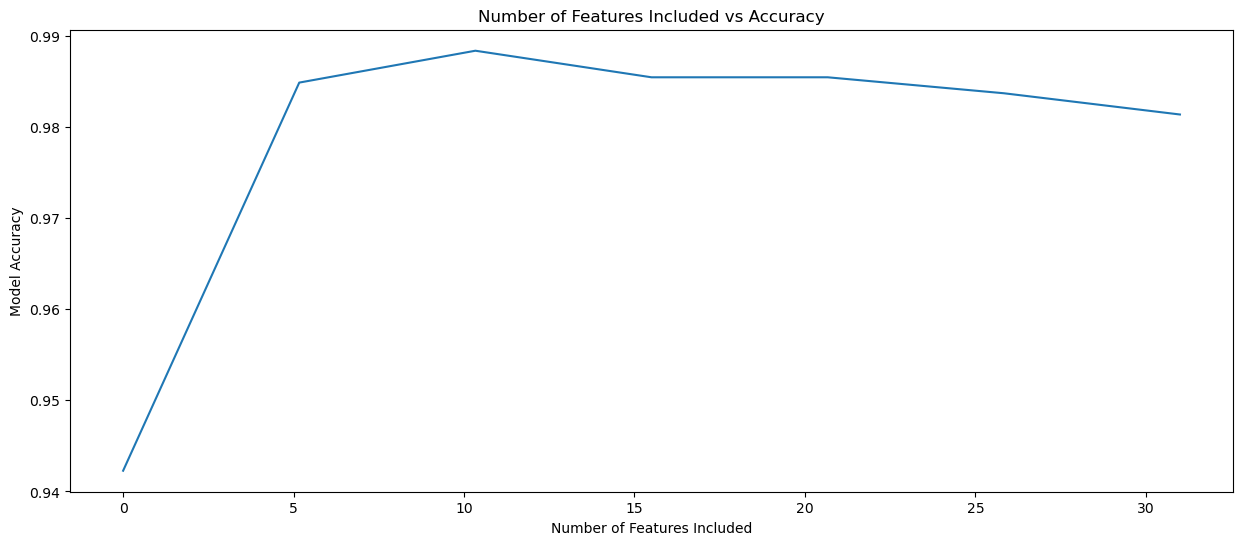

In [419]:
plt.figure( figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')
plt.plot(np.linspace(0,31,7), rfecv.cv_results_['mean_test_score'])
plt.show()

## DATA TRAINING USING DECISION TREE CLASSIFIER

In [250]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train_fs, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

### MODEL EVALUATION

Accuracy Score: 97.63%


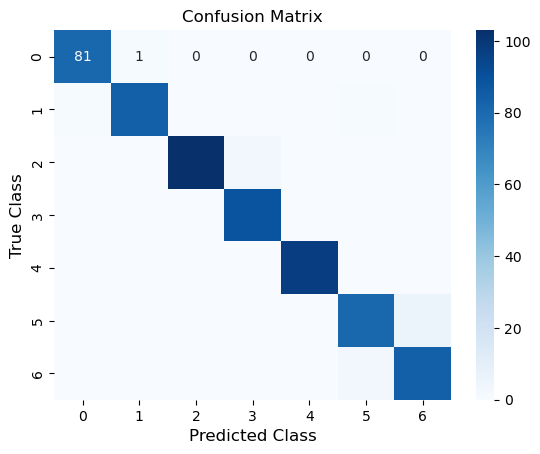

In [253]:
y_pred = classifier.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [255]:
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.98


Confusion Matrix:
[[ 81   1   0   0   0   0   0]
 [  1  84   0   0   0   1   0]
 [  0   0 103   3   0   0   0]
 [  0   0   0  89   0   0   0]
 [  0   0   0   0  97   0   0]
 [  0   0   0   0   0  81   6]
 [  0   0   0   0   0   3  84]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        82
         1.0       0.99      0.98      0.98        86
         2.0       1.00      0.97      0.99       106
         3.0       0.97      1.00      0.98        89
         4.0       1.00      1.00      1.00        97
         5.0       0.95      0.93      0.94        87
         6.0       0.93      0.97      0.95        87

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634



### HYPERPARAMETER TUNING WITH DECISION TREE MODEL 

In [258]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the model
grid_search.fit(X_train_fs, y_train)  

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 960 candidates, totalling 4800 fits
Best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Best cross-validation score: 0.974927113702624


### USING BEST PARAMETERS

In [261]:
best_model = grid_search.best_estimator_
best_model.fit(X_train_fs, y_train)

DecisionTreeClassifier(max_depth=5)

Accuracy Score: 97.32%


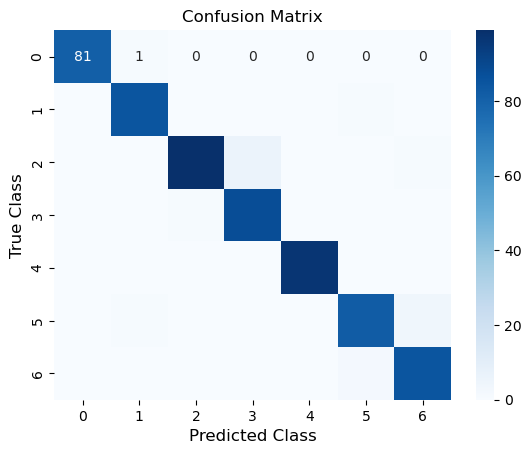

In [263]:
y_pred = best_model.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [265]:
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.97


Confusion Matrix:
[[81  1  0  0  0  0  0]
 [ 0 85  0  0  0  1  0]
 [ 0  0 99  6  0  0  1]
 [ 0  0  1 88  0  0  0]
 [ 0  0  0  0 97  0  0]
 [ 0  1  0  0  0 82  4]
 [ 0  0  0  0  0  2 85]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        82
         1.0       0.98      0.99      0.98        86
         2.0       0.99      0.93      0.96       106
         3.0       0.94      0.99      0.96        89
         4.0       1.00      1.00      1.00        97
         5.0       0.96      0.94      0.95        87
         6.0       0.94      0.98      0.96        87

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634



## DATA TRAINING USING KNEIGHBOURS CLASSIFIER

In [268]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train_fs, y_train)

KNeighborsClassifier()

### MODEL EVALUATION

Accuracy Score: 83.44%


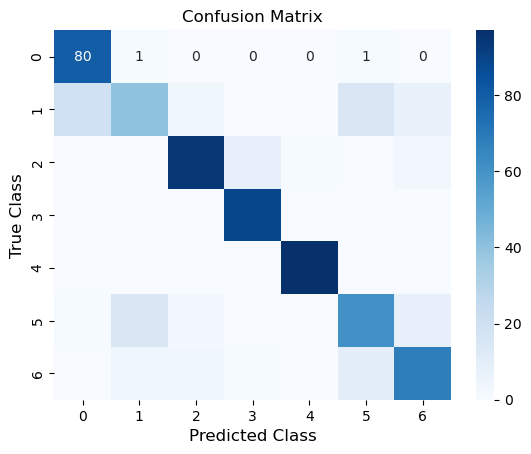

In [271]:
## Evaluating the model, predicting test set results
y_pred = classifier.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [273]:
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.83


Confusion Matrix:
[[80  1  0  0  0  1  0]
 [20 40  4  0  0 15  7]
 [ 0  0 94  8  1  0  3]
 [ 0  0  0 89  0  0  0]
 [ 0  0  0  0 97  0  0]
 [ 1 15  2  0  0 61  8]
 [ 0  4  4  1  0 10 68]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87        82
         1.0       0.67      0.47      0.55        86
         2.0       0.90      0.89      0.90       106
         3.0       0.91      1.00      0.95        89
         4.0       0.99      1.00      0.99        97
         5.0       0.70      0.70      0.70        87
         6.0       0.79      0.78      0.79        87

    accuracy                           0.83       634
   macro avg       0.82      0.83      0.82       634
weighted avg       0.83      0.83      0.83       634



### HYPERPARAMETER TUNING WITH KNN MODEL 

In [276]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

# Fit the model
grid_search.fit(X_train_fs, y_train)  

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9276967930029155


### USING BEST PARAMETERS

In [279]:
best_model2 = grid_search.best_estimator_
best_model2.fit(X_train_fs, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

### MODEL EVALUATION

Accuracy Score: 91.17%


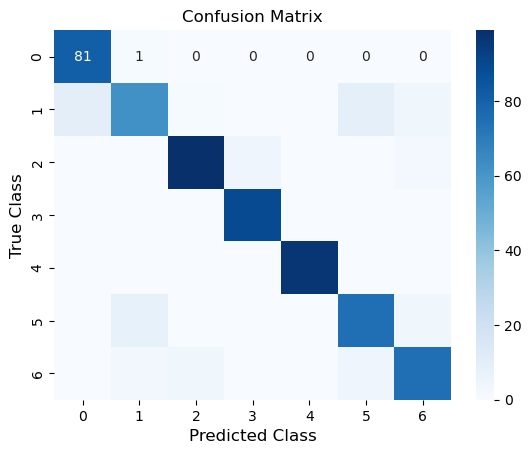

In [282]:
y_pred = best_model2.predict(X_test_fs)

print(f"Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%")

from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)

ax = sns.heatmap(cm, cmap='Blues',annot=True, fmt='d')
plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)
plt.show()

In [284]:
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('------------------------------------------------------')
result = metrics.classification_report(y_test,y_pred)
print('Classification Report: \n')
print(result)

accuracy:0.91


Confusion Matrix:
[[81  1  0  0  0  0  0]
 [10 62  1  0  0  9  4]
 [ 0  0 99  5  0  0  2]
 [ 0  0  0 89  0  0  0]
 [ 0  0  0  0 97  0  0]
 [ 0  8  0  0  0 75  4]
 [ 0  3  4  0  0  5 75]] 


------------------------------------------------------
Classification Report: 

              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94        82
         1.0       0.84      0.72      0.77        86
         2.0       0.95      0.93      0.94       106
         3.0       0.95      1.00      0.97        89
         4.0       1.00      1.00      1.00        97
         5.0       0.84      0.86      0.85        87
         6.0       0.88      0.86      0.87        87

    accuracy                           0.91       634
   macro avg       0.91      0.91      0.91       634
weighted avg       0.91      0.91      0.91       634

